In [151]:
#LIBRARY
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/penugasan-oprec-dsai-2024/sample_submission.csv
/kaggle/input/penugasan-oprec-dsai-2024/Train.csv
/kaggle/input/penugasan-oprec-dsai-2024/Test.csv


In [152]:
train_data = pd.read_csv ("/kaggle/input/penugasan-oprec-dsai-2024/Train.csv")
test_data = pd.read_csv("/kaggle/input/penugasan-oprec-dsai-2024/Test.csv")

# EXPLORATORY DATA ANALYSIS

In [153]:
train_data.head(10)

id  work_year experience_level employment_type  \
0   0     2024.0              NaN              FT   
1   1     2024.0               SE              FT   
2   2     2024.0              NaN              FT   
3   3     2024.0              NaN             NaN   
4   4     2024.0               SE              FT   
5   5        NaN              NaN              FT   
6  10     2023.0               SE              FT   
7  11        NaN              NaN              FT   
8  12     2024.0               MI             NaN   
9  13        NaN               SE              FT   

                        job_title salary_currency employee_residence  \
0                   Data Engineer             USD                 US   
1               Software Engineer             USD                 US   
2       Machine Learning Engineer             USD                 US   
3                   Data Engineer             USD                 US   
4                 Product Manager             USD                 US   
5         Data Management Analyst             USD                 US   
6       Machine Learning Engineer             USD                 US   
7                      Consultant             USD                 US   
8                  Data Scientist             USD                 US   
9  Business Intelligence Engineer             USD                 US   

   remote_ratio company_location company_size  salary  
0           0.0               US            M  138000  
1           2.0              NaN            M  180000  
2           0.0               US            M  118500  
3           0.0               US            M  180000  
4           0.0               US          NaN  204000  
5           0.0               US            M   70000  
6           NaN               US          NaN  276000  
7           0.0               US            M  125000  
8           2.0              NaN            M  135000  
9           0.0              NaN            L  202800

In [154]:
train_data.shape

(35078, 11)

In [155]:
test_data.shape

(8770, 10)

In [156]:
train_data.duplicated().sum()

0

In [157]:
train_data.dtypes

id                      int64
work_year             float64
experience_level       object
employment_type        object
job_title              object
salary_currency        object
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
salary                  int64
dtype: object

In [158]:
train_data.isnull().sum()

id                       0
work_year             7016
experience_level      7016
employment_type       7016
job_title                0
salary_currency          0
employee_residence    7016
remote_ratio          7016
company_location      7016
company_size          7016
salary                   0
dtype: int64

In [159]:
for column in train_data.columns:
    print(f"Kolom '{column}':")
    print(train_data[column].unique())
    print("\n")

Kolom 'id':
[    0     1     2 ... 49997 49998 49999]


Kolom 'work_year':
[2024.   nan 2023. 2022. 2020. 2021.]


Kolom 'experience_level':
[nan 'SE' 'MI' 'EN' 'EX']


Kolom 'employment_type':
['FT' nan 'PT' 'CT' 'FL']


Kolom 'job_title':
['Data Engineer' 'Software Engineer' 'Machine Learning Engineer'
 'Product Manager' 'Data Management Analyst' 'Consultant' 'Data Scientist'
 'Business Intelligence Engineer' 'Data Analytics Lead' 'AI Scientist'
 'Research Scientist' 'Data Manager' 'Data Analyst' 'Analytics Engineer'
 'Data Governance Engineer' 'Applied Scientist' 'Engineer' 'BI Developer'
 'Robotics Engineer' 'Data Visualization Analyst' 'Research Engineer'
 'Data Management Specialist' 'Solutions Architect'
 'Machine Learning Scientist' 'Data Analytics Manager' 'Manager'
 'Quantitative Analyst' 'Data Architect' 'Business Intelligence'
 'Data Operations Analyst' 'AI Engineer' 'Associate' 'Research Analyst'
 'Decision Scientist' 'Engineering Manager'
 'Business Intelligence Analyst'


In [160]:
train_data.head()

id  work_year experience_level employment_type                  job_title  \
0   0     2024.0              NaN              FT              Data Engineer   
1   1     2024.0               SE              FT          Software Engineer   
2   2     2024.0              NaN              FT  Machine Learning Engineer   
3   3     2024.0              NaN             NaN              Data Engineer   
4   4     2024.0               SE              FT            Product Manager   

  salary_currency employee_residence  remote_ratio company_location  \
0             USD                 US           0.0               US   
1             USD                 US           2.0              NaN   
2             USD                 US           0.0               US   
3             USD                 US           0.0               US   
4             USD                 US           0.0               US   

  company_size  salary  
0            M  138000  
1            M  180000  
2            M  118500  
3            M  180000  
4          NaN  204000

In [161]:
# Contoh distribusi untuk kolom kategorikal 
print(train_data['work_year'].value_counts(dropna=False))
print(train_data['experience_level'].value_counts(dropna=False))
print(train_data['employment_type'].value_counts(dropna=False))
print(train_data['job_title'].value_counts(dropna=False))
print(train_data['salary_currency'].value_counts(dropna=False))
print(train_data['employee_residence'].value_counts(dropna=False))
print(train_data['remote_ratio'].value_counts(dropna=False))
print(train_data['company_location'].value_counts(dropna=False))
print(train_data['company_size'].value_counts(dropna=False))

work_year
2024.0    21991
NaN        7016
2023.0     4218
2022.0     1186
2021.0      457
2020.0      210
Name: count, dtype: int64
experience_level
SE     15976
MI      8424
NaN     7016
EN      2493
EX      1169
Name: count, dtype: int64
employment_type
FT     27500
NaN     7016
CT       269
PT       201
FL        92
Name: count, dtype: int64
job_title
Data Scientist                       5322
Data Engineer                        5050
Data Analyst                         4126
Software Engineer                    3337
Machine Learning Engineer            2377
                                     ... 
Principal Data Analyst                  2
Power BI Consultant                     2
Applied Machine Learning Engineer       2
Staff Data Scientist                    2
Big Data Architect                      2
Name: count, Length: 209, dtype: int64
salary_currency
USD      33830
GBP        607
EUR        454
Other      115
CAD         51
INR          7
CHF          6
BRL          4
PLN   

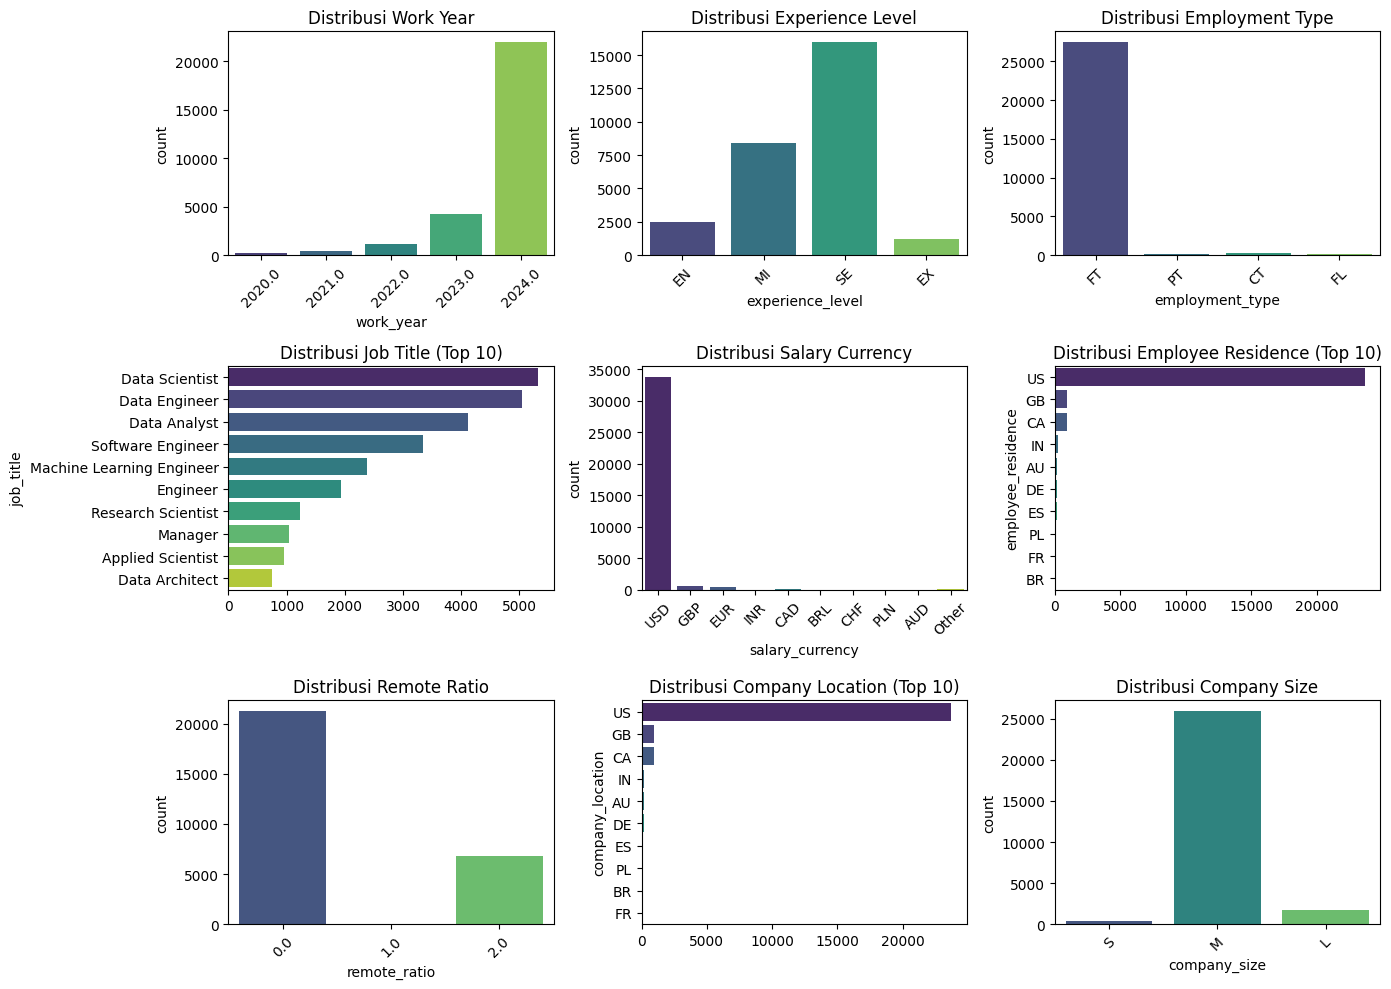

In [162]:

# Set ukuran figure
plt.figure(figsize=(14, 10))

# Visualisasi distribusi kolom 'work_year'
plt.subplot(3, 3, 1)
sns.countplot(data=train_data, x='work_year', palette='viridis')
plt.title("Distribusi Work Year")
plt.xticks(rotation=45)

# Visualisasi distribusi kolom 'experience_level'
plt.subplot(3, 3, 2)
sns.countplot(data=train_data, x='experience_level', palette='viridis', order=['EN', 'MI', 'SE', 'EX'])
plt.title("Distribusi Experience Level")
plt.xticks(rotation=45)

# Visualisasi distribusi kolom 'employment_type'
plt.subplot(3, 3, 3)
sns.countplot(data=train_data, x='employment_type', palette='viridis')
plt.title("Distribusi Employment Type")
plt.xticks(rotation=45)

# Visualisasi distribusi kolom 'job_title' (Top 10 paling sering muncul)
plt.subplot(3, 3, 4)
job_counts = train_data['job_title'].value_counts().nlargest(10)
sns.barplot(x=job_counts.values, y=job_counts.index, palette='viridis')
plt.title("Distribusi Job Title (Top 10)")

# Visualisasi distribusi kolom 'salary_currency'
plt.subplot(3, 3, 5)
sns.countplot(data=train_data, x='salary_currency', palette='viridis')
plt.title("Distribusi Salary Currency")
plt.xticks(rotation=45)

# Visualisasi distribusi kolom 'employee_residence' (Top 10)
plt.subplot(3, 3, 6)
residence_counts = train_data['employee_residence'].value_counts().nlargest(10)
sns.barplot(x=residence_counts.values, y=residence_counts.index, palette='viridis')
plt.title("Distribusi Employee Residence (Top 10)")

# Visualisasi distribusi kolom 'remote_ratio'
plt.subplot(3, 3, 7)
sns.countplot(data=train_data, x='remote_ratio', palette='viridis')
plt.title("Distribusi Remote Ratio")
plt.xticks(rotation=45)

# Visualisasi distribusi kolom 'company_location' (Top 10)
plt.subplot(3, 3, 8)
location_counts = train_data['company_location'].value_counts().nlargest(10)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title("Distribusi Company Location (Top 10)")

# Visualisasi distribusi kolom 'company_size'
plt.subplot(3, 3, 9)
sns.countplot(data=train_data, x='company_size', palette='viridis', order=['S', 'M', 'L'])
plt.title("Distribusi Company Size")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


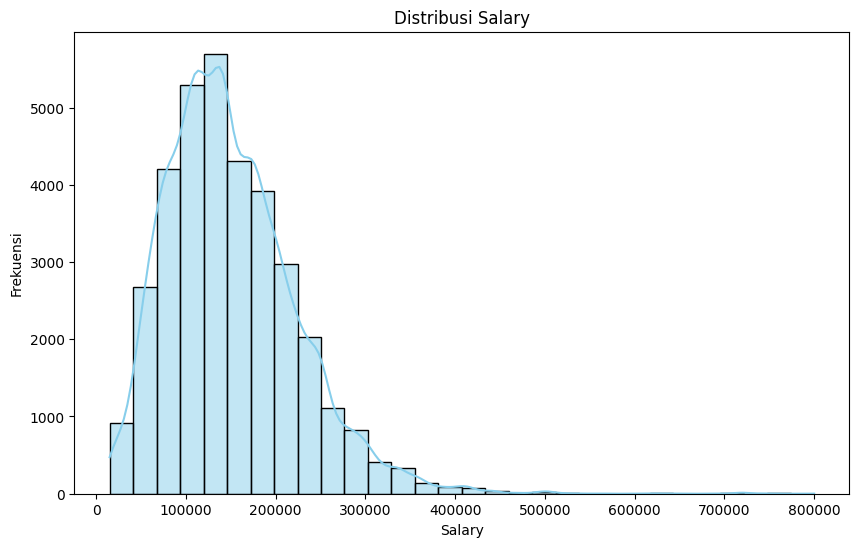

In [163]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='salary', kde=True, bins=30, color='skyblue')
plt.title('Distribusi Salary')
plt.xlabel('Salary')
plt.ylabel('Frekuensi')
plt.show()


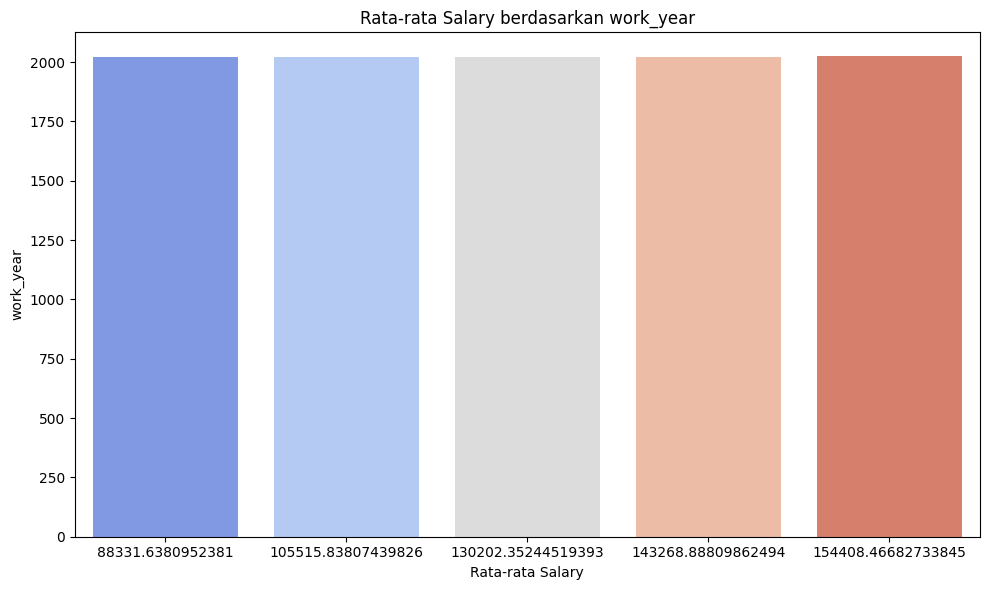

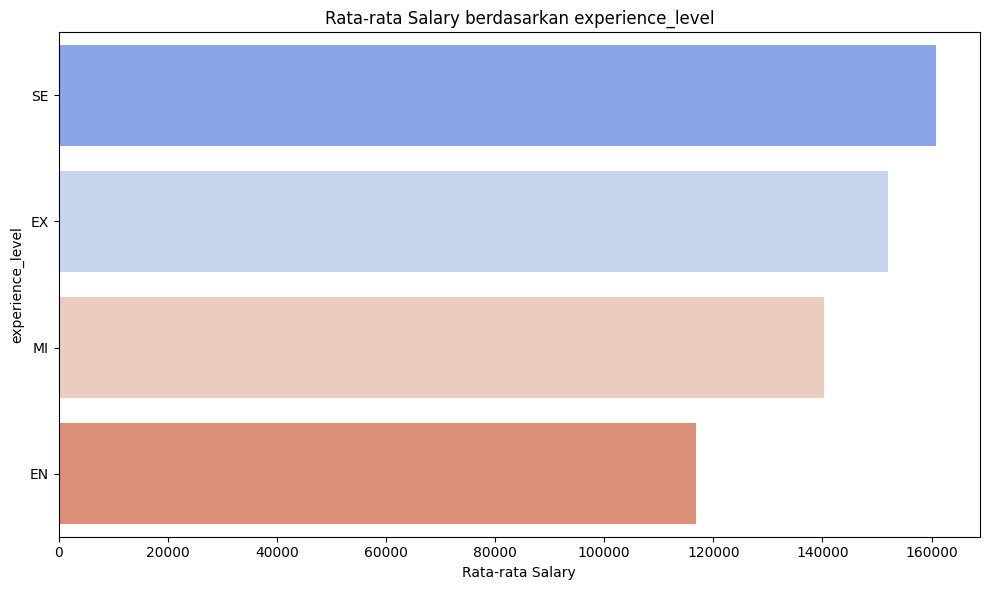

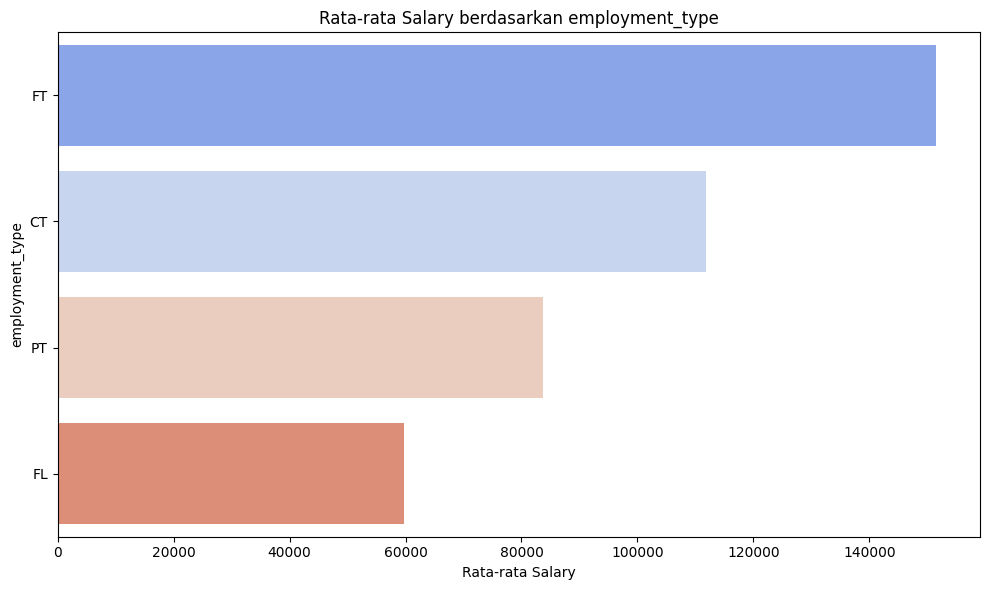

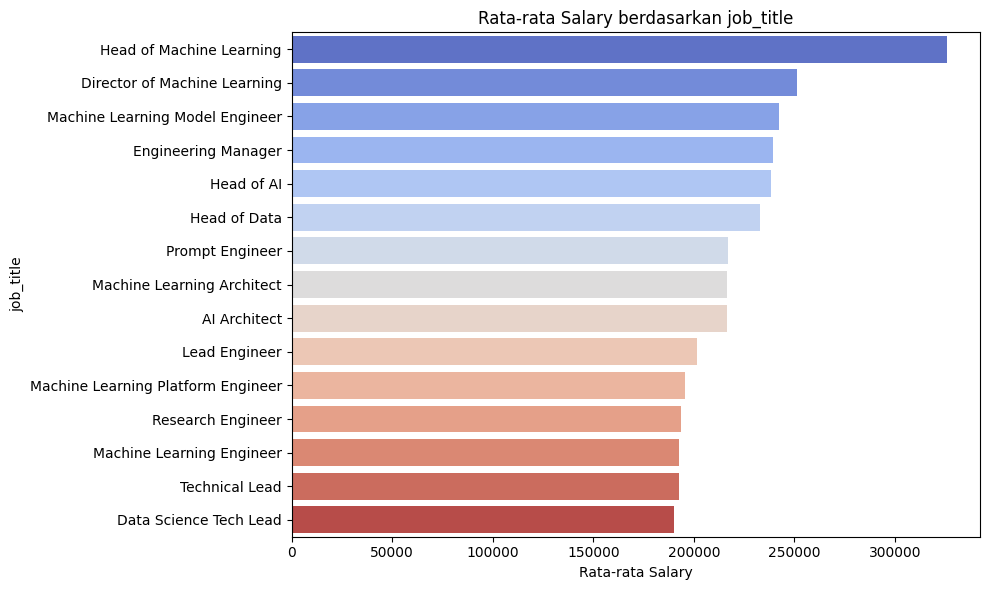

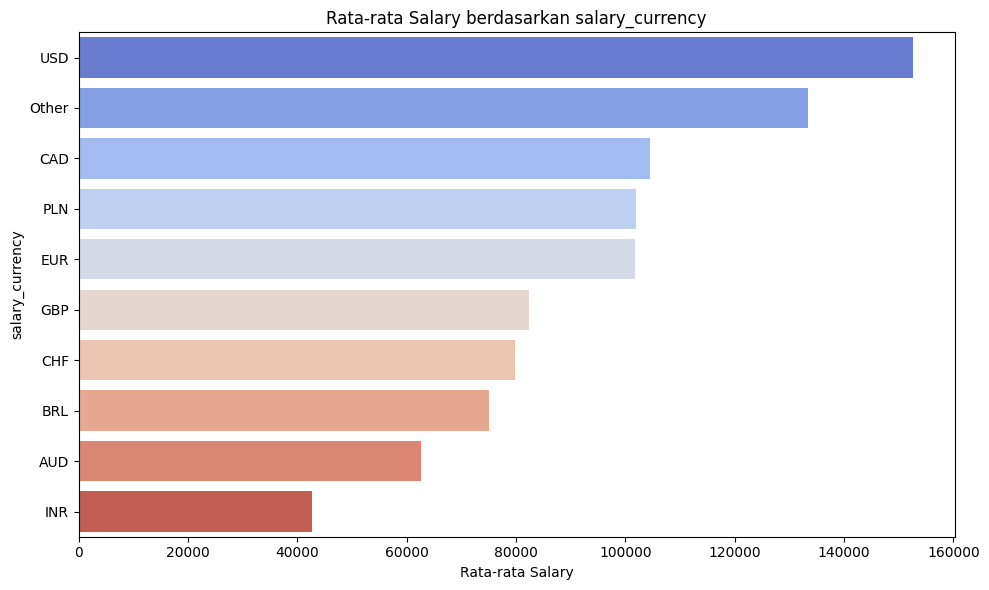

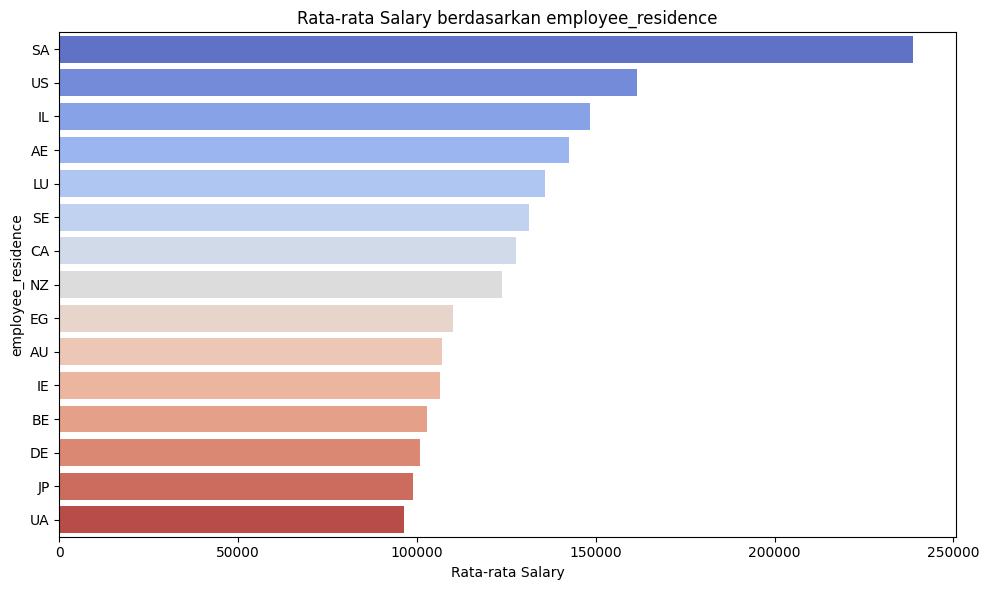

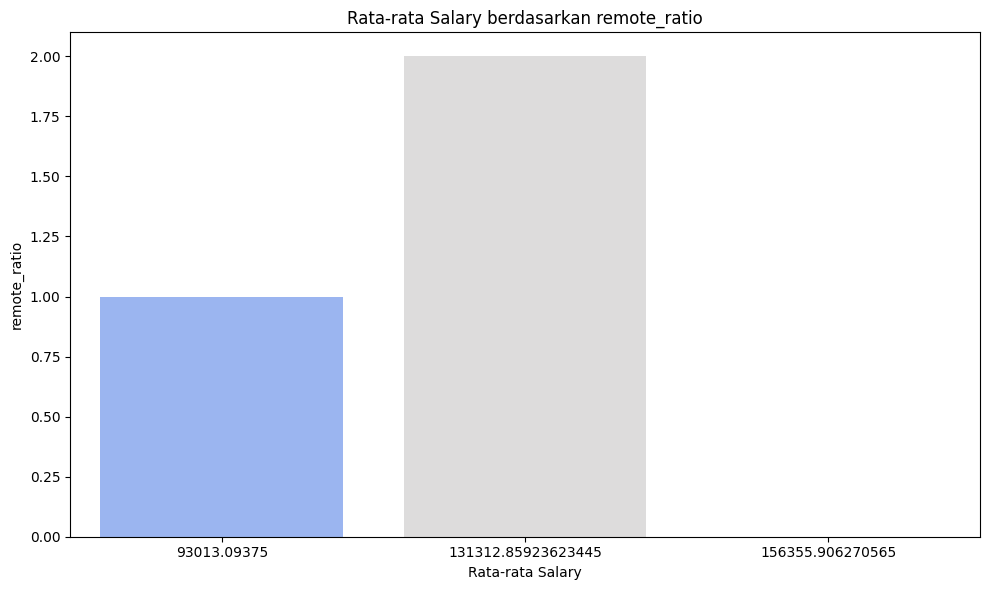

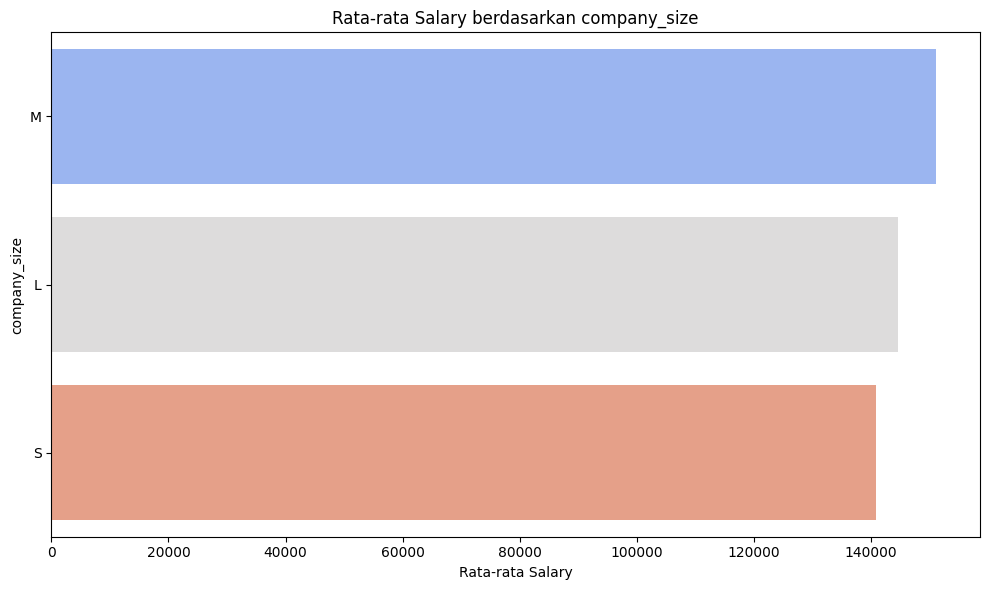

In [164]:

# Daftar kolom yang ingin divisualisasikan
columns_to_plot = [
    'work_year', 'experience_level', 'employment_type', 'job_title',
    'salary_currency', 'employee_residence', 'remote_ratio', 'company_size'
]

# Loop untuk membuat visualisasi
for col in columns_to_plot:
    if col in train_data.columns:
        # Hitung rata-rata salary per kategori
        avg_salary = train_data.groupby(col)['salary'].mean().sort_values(ascending=False)
        
        # Untuk 'job_title' dan 'employee_residence', ambil hanya 20 kategori teratas
        if col in ['job_title', 'employee_residence','company_location']:
            avg_salary = avg_salary.head(15)
        
        # Plot bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='coolwarm')
        plt.title(f'Rata-rata Salary berdasarkan {col}')
        plt.xlabel('Rata-rata Salary')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Kolom '{col}' tidak ditemukan dalam dataset.")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


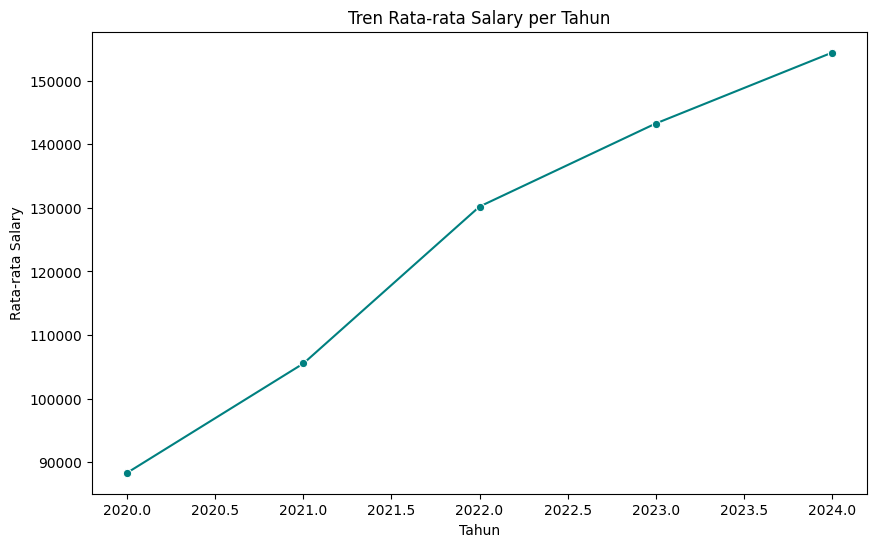

In [165]:
avg_salary_by_year = train_data.groupby('work_year')['salary'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_salary_by_year.index, y=avg_salary_by_year.values, marker='o', color='teal')
plt.title('Tren Rata-rata Salary per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Salary')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


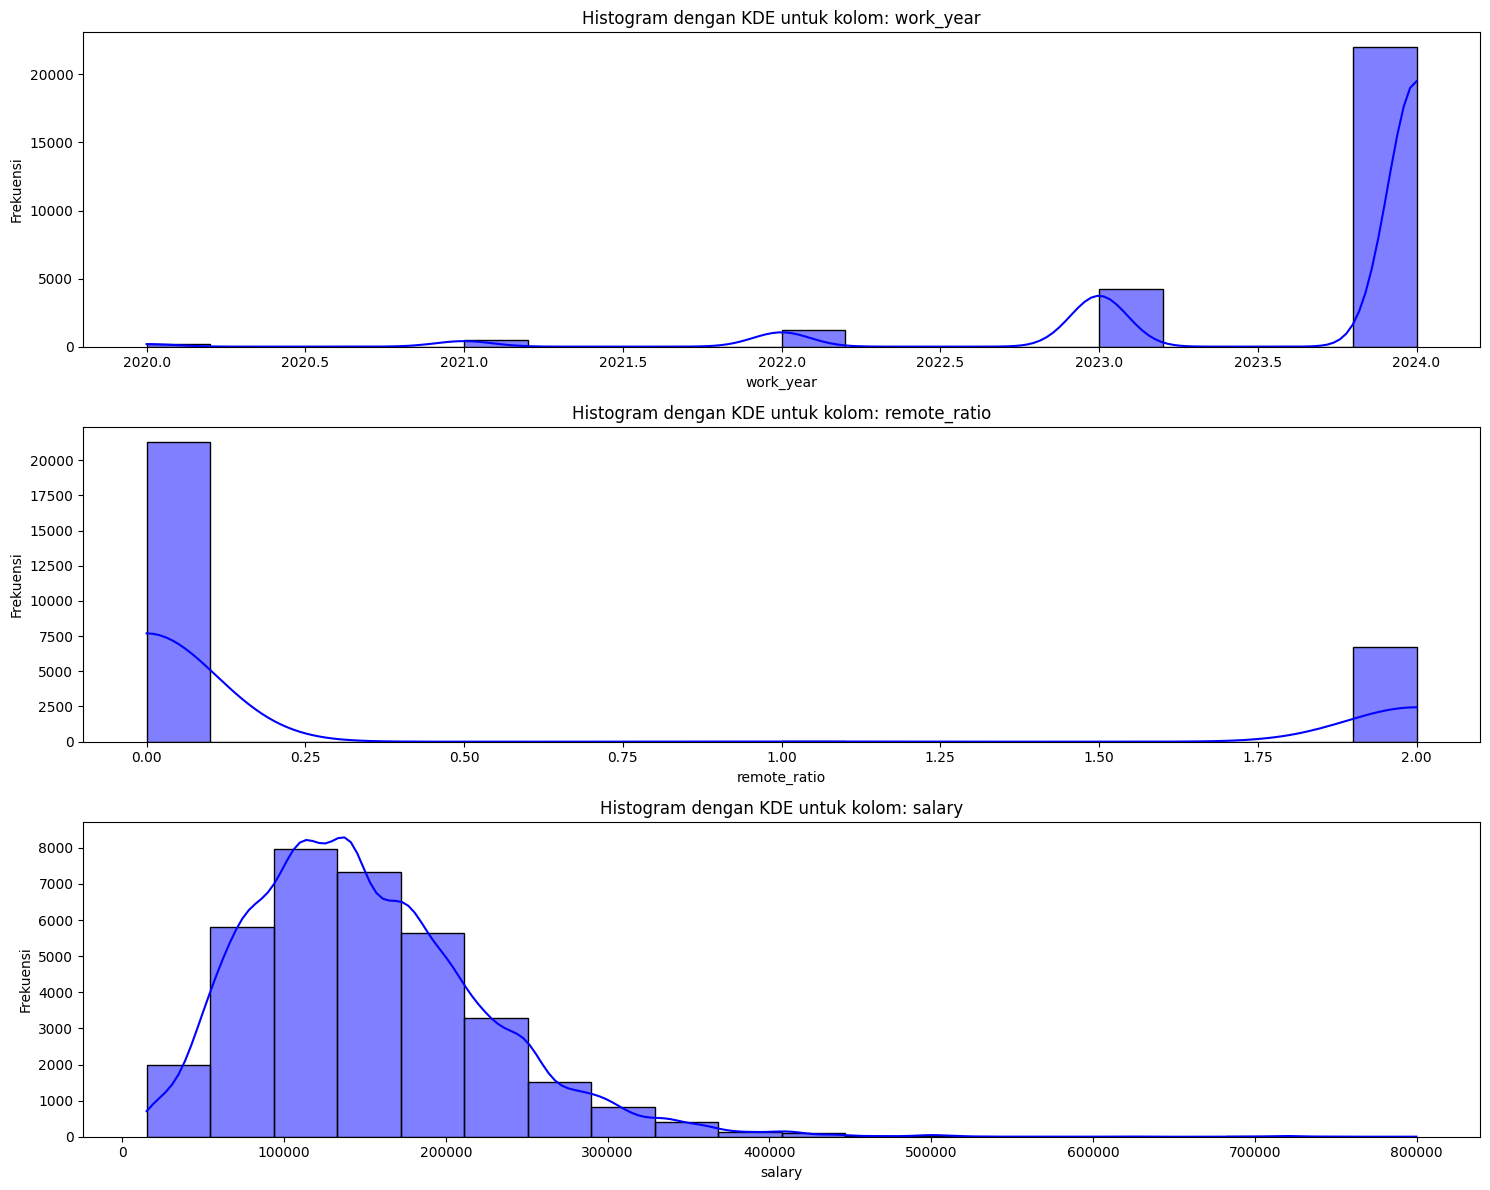

In [166]:

# Pilih hanya kolom yang ingin ditampilkan
columns_to_plot = ['work_year', 'remote_ratio', 'salary']

# Mengatur ukuran figure agar dapat memuat semua plot dengan rapi
plt.figure(figsize=(15, len(columns_to_plot) * 4))

# Loop untuk membuat plot histogram dengan KDE untuk setiap kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.histplot(train_data[column], kde=True, bins=20, color='blue')
    plt.title(f'Histogram dengan KDE untuk kolom: {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


# DATA PREPROCESSING

**menghapus fitur yang tidak relevan / tidak penting**

In [167]:
train_data.drop(columns=["id"], inplace = True)

**Mengisi nilai NaN pada kolom kategorikal dengan modus karena data merupakan kategorikal atau data yang dianggap kategorikal**

In [168]:
train_data['experience_level'] = train_data['experience_level'].fillna(train_data['experience_level'].mode()[0])
train_data['employment_type'] = train_data['employment_type'].fillna(train_data['employment_type'].mode()[0])
train_data['employee_residence'] = train_data['employee_residence'].fillna(train_data['employee_residence'].mode()[0])
train_data['company_location'] = train_data['company_location'].fillna(train_data['company_location'].mode()[0])
train_data['company_size'] = train_data['company_size'].fillna(train_data['company_size'].mode()[0])
train_data['remote_ratio'] = train_data['remote_ratio'].fillna(train_data['remote_ratio'].mode()[0])
train_data['work_year'] = train_data['work_year'].fillna(train_data['work_year'].mode()[0])

**Melakukan encoding dengan beberapa metode**

**TARGET ENCODING**

*menggunakan target encoding untuk data yang merupakan high cardinality*

In [169]:
#Target Encoding 
from category_encoders import TargetEncoder

target_encoder = TargetEncoder(cols=['employee_residence', 'company_location', 'job_title'])


train_data[['employee_residence', 'company_location', 'job_title']] = target_encoder.fit_transform(
    train_data[['employee_residence', 'company_location', 'job_title']], train_data['salary']
)

test_data[['employee_residence', 'company_location', 'job_title']] = target_encoder.transform(
    test_data[['employee_residence', 'company_location', 'job_title']]
)


**ONE HOT-ENCODING**

*menggunakan One Hot-encoding untuk data yang bukan high cardinality*

In [170]:
# Menggunakan pandas get_dummies untuk One-Hot Encoding
train_data = pd.get_dummies(train_data, columns=['salary_currency'], prefix='currency')

# Melakukan hal yang sama pada test_data untuk memastikan konsistensi kolom
test_data = pd.get_dummies(test_data, columns=['salary_currency'], prefix='currency')

# Menyelaraskan kolom train_data dan test_data agar memiliki kolom yang sama setelah one-hot encoding
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)


**LABEL ENCODING**

*menggunakan label encoding untuk kolom bertipe kategorikal yang memiliki urutan*

In [171]:
# Mapping untuk kolom experience_level, employment_type, dan company_size
experience_level_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
employment_type_mapping = {'FL': 1, 'PT': 2, 'FT': 3, 'CT': 4}
company_size_mapping = {'S': 1, 'M': 2, 'L': 3}

# Melakukan encoding sesuai mapping pada train_data
train_data['experience_level'] = train_data['experience_level'].map(experience_level_mapping)
train_data['employment_type'] = train_data['employment_type'].map(employment_type_mapping)
train_data['company_size'] = train_data['company_size'].map(company_size_mapping)

# Melakukan hal yang sama pada test_data
test_data['experience_level'] = test_data['experience_level'].map(experience_level_mapping)
test_data['employment_type'] = test_data['employment_type'].map(employment_type_mapping)
test_data['company_size'] = test_data['company_size'].map(company_size_mapping)

# Menampilkan hasil
print(train_data[['experience_level', 'employment_type', 'company_size']].head())
print(test_data[['experience_level', 'employment_type', 'company_size']].head())


   experience_level  employment_type  company_size
0                 3                3             2
1                 3                3             2
2                 3                3             2
3                 3                3             2
4                 3                3             2
   experience_level  employment_type  company_size
0                 3                4             2
1                 2                3             2
2                 3                3             2
3                 3                3             2
4                 2                3             2


In [172]:
train_data.head()

work_year  experience_level  employment_type      job_title  \
0     2024.0                 3                3  135000.283366   
1     2024.0                 3                3  183186.860354   
2     2024.0                 3                3  192519.545646   
3     2024.0                 3                3  135000.283366   
4     2024.0                 3                3  185060.581683   

   employee_residence  remote_ratio  company_location  company_size  salary  \
0       158892.936536           0.0      158844.50771             2  138000   
1       158892.936536           2.0      158844.50771             2  180000   
2       158892.936536           0.0      158844.50771             2  118500   
3       158892.936536           0.0      158844.50771             2  180000   
4       158892.936536           0.0      158844.50771             2  204000   

   currency_AUD  currency_BRL  currency_CAD  currency_CHF  currency_EUR  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   currency_GBP  currency_INR  currency_Other  currency_PLN  currency_USD  
0         False         False           False         False          True  
1         False         False           False         False          True  
2         False         False           False         False          True  
3         False         False           False         False          True  
4         False         False           False         False          True

**Menampilkan Grafik Boxplot untuk data numerik untuk mendeteksi outlier**

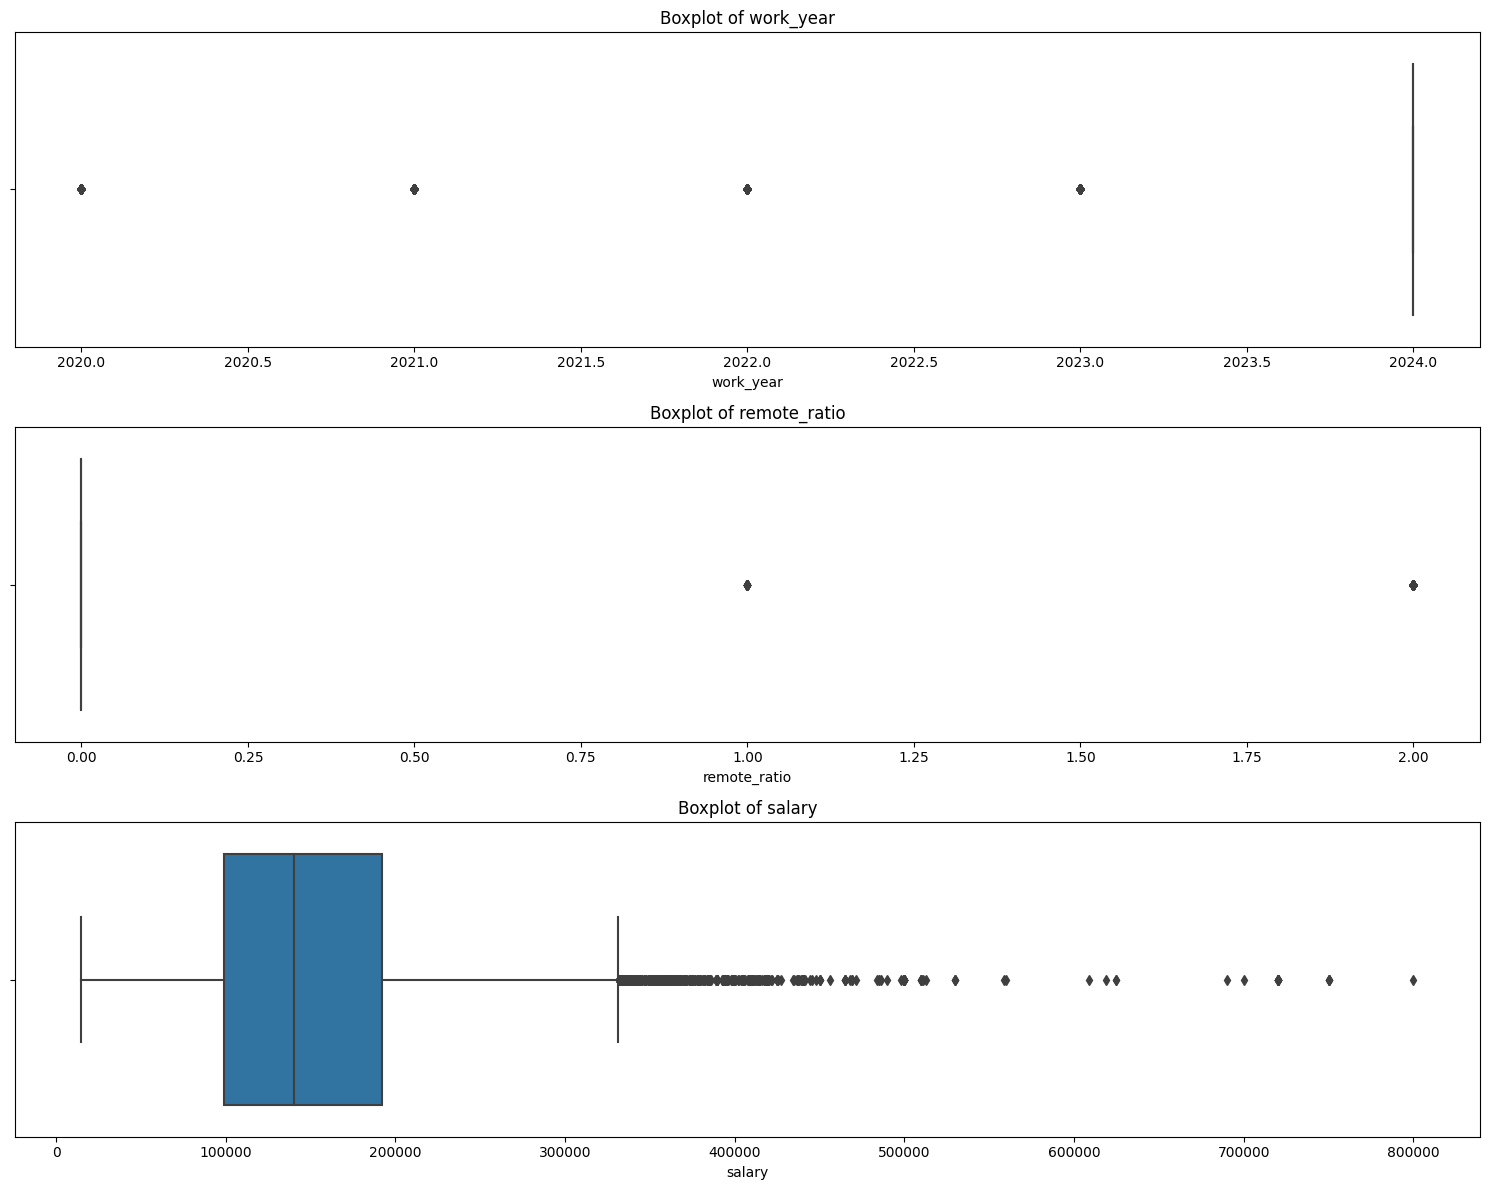

In [173]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
selected_features = ['work_year', 'remote_ratio', 'salary']

# Buat boxplot untuk setiap kolom yang dipilih
plt.figure(figsize=(15, len(selected_features) * 4))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    sns.boxplot(data=train_data, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

**Mengatasi Outlier**

*sebetulnya saya agak bimbang untuk mengubah-ubah sesuatu pada kolom target, tetapi somehow hal ini meningkatkan hasil prediksi saya*

In [174]:
original_indices = train_data.index

# Initialize an empty set to store indices of outliers
outlier_indices = set()

# Loop through each numeric column and identify outliers based on the IQR method

Q1 = train_data['salary'].quantile(0.25)
Q3 = train_data['salary'].quantile(0.75)
IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
    # Identify the indices of outliers
column_outliers = train_data[(train_data['salary'] < lower_bound) | (train_data['salary'] > upper_bound)].index
outlier_indices.update(column_outliers)

# Convert the set of outlier indices to a list
outlier_indices = list(outlier_indices)

# Drop the outliers from X_train and y_train
train_data = train_data.drop(outlier_indices)
print("Indices of dropped outliers:", outlier_indices)

Indices of dropped outliers: [16387, 12297, 16395, 10252, 12302, 14350, 18448, 6162, 20499, 20, 2068, 22553, 10267, 14364, 30747, 24614, 4136, 18472, 2092, 16428, 53, 20535, 30777, 6203, 14396, 20542, 6207, 18501, 12358, 8265, 10313, 20554, 24651, 77, 18518, 14424, 14426, 8283, 22620, 18526, 30814, 10340, 18535, 8297, 20591, 8304, 32881, 2164, 34932, 32887, 14459, 18557, 8322, 28802, 28803, 10373, 22662, 4233, 12427, 12431, 150, 151, 10395, 32924, 14498, 10404, 170, 2219, 12458, 34986, 30895, 28848, 4275, 20663, 4282, 2237, 16576, 35014, 28876, 2255, 6353, 22741, 14552, 14553, 8411, 16607, 22757, 32998, 12519, 232, 12520, 4330, 20711, 10477, 33007, 8432, 2299, 2300, 20732, 33022, 10498, 2308, 18693, 22788, 18696, 18698, 16651, 22794, 6413, 8463, 10515, 6424, 26909, 20775, 16684, 22829, 8495, 31023, 16692, 8504, 18748, 26944, 14658, 6469, 10569, 10571, 29003, 10579, 22867, 26965, 12637, 4446, 14687, 33120, 22887, 4458, 8555, 2416, 369, 10611, 372, 20855, 6524, 12668, 20861, 27005, 31100

**Correlation Heatmap**

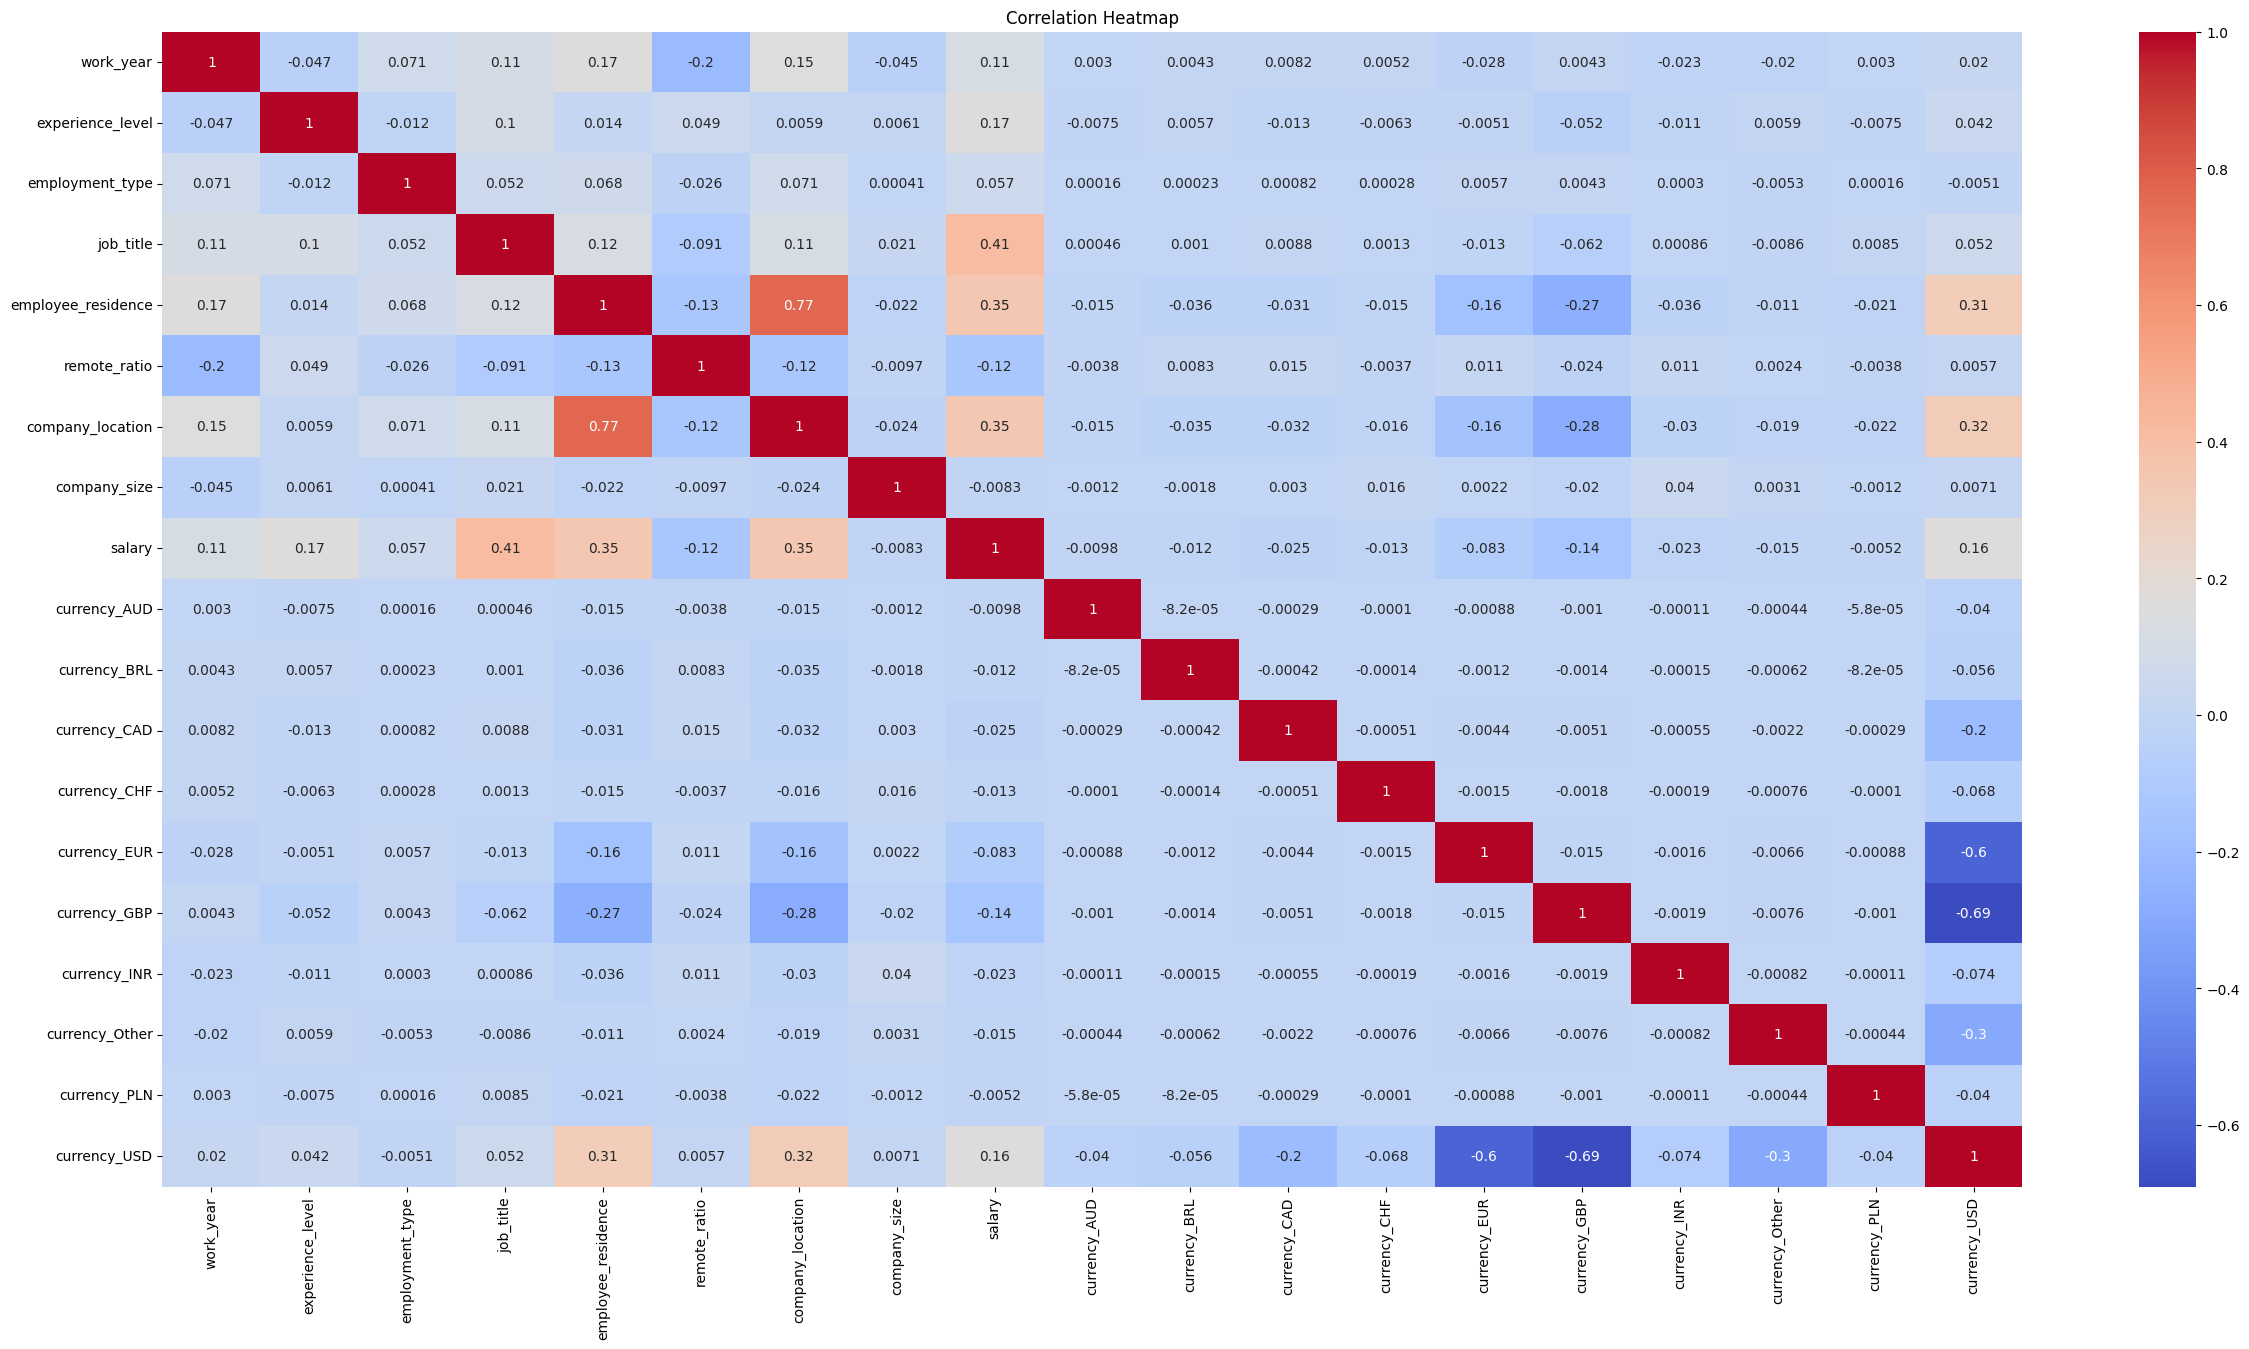

In [175]:
plt.figure(figsize=(30,15))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# MODELLING

**Membagi Dataset menjadi training, testing, dan validation dengan rasio 60%, 20%, 20%**

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train_data.drop(columns='salary')
y = train_data['salary']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (20634, 18) (20634,)
Testing set shape: (6878, 18) (6878,)
Validation set shape: (6878, 18) (6878,)


> ***Mencoba berbagai model dan menggunakan Hyperparameter tuning dengan Optuna***

**Model Catboost**

In [177]:
from catboost import CatBoostRegressor


# Inisialisasi model CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, verbose=100)

# Melatih model dengan set validasi
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100)

# Melakukan prediksi
y_pred = catboost_model.predict(X_test)

# Evaluasi dengan RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

0:	learn: 63275.9136479	test: 62655.6607491	best: 62655.6607491 (0)	total: 11.2ms	remaining: 11.2s
100:	learn: 52643.0120430	test: 53148.6857831	best: 53140.3583140 (91)	total: 990ms	remaining: 8.81s
200:	learn: 51975.9993124	test: 53043.4390809	best: 53040.6445607 (196)	total: 2.06s	remaining: 8.17s
300:	learn: 51505.4623320	test: 53048.7737137	best: 53034.2526833 (215)	total: 3.27s	remaining: 7.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 53034.25268
bestIteration = 215

Shrink model to first 216 iterations.
RMSE: 52301.823207155576


In [178]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [179]:
import catboost as cb
import optuna

# Definisi fungsi objective untuk Optuna
def objective(trial):
    params = {
        'iterations': trial.suggest_int("iterations", 100, 1500, step=100),
        'depth': trial.suggest_int("depth", 3, 10),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform("l2_leaf_reg", 1e-5, 10),
        'bagging_temperature': trial.suggest_uniform("bagging_temperature", 0.0, 1.0),
        'border_count': trial.suggest_int("border_count", 32, 255),
    }

    # Inisialisasi model CatBoostRegressor
    model = cb.CatBoostRegressor(**params, random_seed=42, verbose=0)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    return val_rmse

# Hyperparameter tuning dengan Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters (CatBoost):", study.best_params)

# Menggunakan model dengan hyperparameter terbaik
best_cb_model = cb.CatBoostRegressor(**study.best_params, random_seed=42, verbose=0)
best_cb_model.fit(X_train_full, y_train_full)
y_test_pred = best_cb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE with best hyperparameters (CatBoost): {test_rmse}")


[I 2024-11-17 14:23:37,382] A new study created in memory with name: no-name-f7a267f1-5ec9-4a42-9e3b-0f3dbc13b1dd
/tmp/ipykernel_4313/3629810729.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/3629810729.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform("l2_leaf_reg", 1e-5, 10),
/tmp/ipykernel_4313/3629810729.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.sugg

Best hyperparameters (CatBoost): {'iterations': 1400, 'depth': 5, 'learning_rate': 0.024981885452173586, 'l2_leaf_reg': 0.00632578663442946, 'bagging_temperature': 0.11865456277876467, 'border_count': 193}
Test RMSE with best hyperparameters (CatBoost): 52055.065521168166


**Model LGB**

In [180]:
import lightgbm as lgb

# Inisialisasi model LightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

# Melatih model menggunakan data training
lgb_model.fit(X_train, y_train)

# Prediksi dan evaluasi pada data validasi
y_val_pred = lgb_model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE (LightGBM): {val_rmse}")

# Prediksi dan evaluasi pada data test
y_test_pred = lgb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE (LightGBM): {test_rmse}")

# Definisi fungsi objective untuk Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 1500, step=100),
        'max_depth': trial.suggest_int("max_depth", 3, 20),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        'num_leaves': trial.suggest_int("num_leaves", 20, 150),
        'min_child_samples': trial.suggest_int("min_child_samples", 10, 100),
    }

    model = lgb.LGBMRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    return val_rmse

# Hyperparameter tuning dengan Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters (LightGBM):", study.best_params)

# Menggunakan model dengan hyperparameter terbaik
best_lgb_model = lgb.LGBMRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_lgb_model.fit(X_train_full, y_train_full)
y_test_pred = best_lgb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE with best hyperparameters (LightGBM): {test_rmse}")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:26:54,453] A new study created in memory with name: no-name-470e56a9-45d3-45d1-b10d-6ea977f173cb


Test RMSE (LightGBM): 52447.9533157208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-17 14:26:58,172] Trial 0 finished with value: 53898.038374521515 and parameters: {'n_estimators': 700, 'max_depth': 19, 'learning_rate': 0.16967748515866055, 'subsample': 0.590179965724387, 'colsample_bytree': 0.9986031787868562, 'num_leaves': 74, 'min_child_samples': 47}. Best is trial 0 with value: 53898.038374521515.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:04,342] Trial 1 finished with value: 53407.01636756349 and parameters: {'n_estimators': 1200, 'max_depth': 20, 'learning_rate': 0.05914072917324767, 'subsample': 0.8519092700083754, 'colsample_bytree': 0.5440817380015015, 'num_leaves': 88, 'min_child_samples': 54}. Best is trial 1 with value: 53407.01636756349.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:10,376] Trial 2 finished with value: 53381.32806848609 and parameters: {'n_estimators': 1500, 'max_depth': 13, 'learning_rate': 0.07963526202879488, 'subsample': 0.86749825623641, 'colsample_bytree': 0.5446594495837289, 'num_leaves': 42, 'min_child_samples': 59}. Best is trial 2 with value: 53381.32806848609.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unifor

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:12,613] Trial 3 finished with value: 53158.0824617041 and parameters: {'n_estimators': 500, 'max_depth': 18, 'learning_rate': 0.06534196793193407, 'subsample': 0.7614551593031211, 'colsample_bytree': 0.7975789888826554, 'num_leaves': 53, 'min_child_samples': 98}. Best is trial 3 with value: 53158.0824617041.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uniform

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:15,847] Trial 4 finished with value: 53175.80683773325 and parameters: {'n_estimators': 800, 'max_depth': 17, 'learning_rate': 0.034759770004575995, 'subsample': 0.7400224366388678, 'colsample_bytree': 0.7024017364664314, 'num_leaves': 52, 'min_child_samples': 29}. Best is trial 3 with value: 53158.0824617041.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unifo

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:17,528] Trial 5 finished with value: 53064.502225555756 and parameters: {'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.010914314446598405, 'subsample': 0.8005754754970156, 'colsample_bytree': 0.9256330765497138, 'num_leaves': 28, 'min_child_samples': 11}. Best is trial 5 with value: 53064.502225555756.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:25,243] Trial 6 finished with value: 53676.781870029736 and parameters: {'n_estimators': 1300, 'max_depth': 20, 'learning_rate': 0.07448905962897935, 'subsample': 0.5871224185132308, 'colsample_bytree': 0.6197598712021217, 'num_leaves': 147, 'min_child_samples': 35}. Best is trial 5 with value: 53064.502225555756.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_u

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:26,629] Trial 7 finished with value: 53049.54243639241 and parameters: {'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.04160583818917412, 'subsample': 0.7867182654366299, 'colsample_bytree': 0.5554558759425932, 'num_leaves': 137, 'min_child_samples': 66}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:27,202] Trial 8 finished with value: 53128.74785326096 and parameters: {'n_estimators': 100, 'max_depth': 18, 'learning_rate': 0.09508514484796116, 'subsample': 0.8839020920670518, 'colsample_bytree': 0.6331681489038705, 'num_leaves': 149, 'min_child_samples': 20}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:33,347] Trial 9 finished with value: 53363.24818360968 and parameters: {'n_estimators': 1200, 'max_depth': 17, 'learning_rate': 0.04972824271649747, 'subsample': 0.6058649205338235, 'colsample_bytree': 0.9743620246845068, 'num_leaves': 106, 'min_child_samples': 68}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:33,783] Trial 10 finished with value: 53569.86379742044 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.020737163107957996, 'subsample': 0.9825392070320005, 'colsample_bytree': 0.8118452419631077, 'num_leaves': 121, 'min_child_samples': 80}. Best is trial 7 with value: 53049.54243639241.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-11-17 14:27:34,745] Trial 11 finished with value: 53102.45083695058 and parameters: {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.013066751837974297, 'subsample': 0.7247564438682618, 'colsample_bytree': 0.8783851759156334, 'num_leaves': 20, 'min_child_samples': 13}. Best is trial 7 with value: 53049.54243639241.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:38,677] Trial 12 finished with value: 53089.81100314955 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.010219698261849569, 'subsample': 0.6905534652831024, 'colsample_bytree': 0.9099130566210493, 'num_leaves': 122, 'min_child_samples': 78}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_u

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:39,517] Trial 13 finished with value: 53132.99814018214 and parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.025609897866897456, 'subsample': 0.7929491681740066, 'colsample_bytree': 0.7126919361371753, 'num_leaves': 21, 'min_child_samples': 40}. Best is trial 7 with value: 53049.54243639241.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:44,151] Trial 14 finished with value: 53649.697157278795 and parameters: {'n_estimators': 1000, 'max_depth': 13, 'learning_rate': 0.23566104123638523, 'subsample': 0.953603593663811, 'colsample_bytree': 0.5034930416547096, 'num_leaves': 79, 'min_child_samples': 71}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:45,332] Trial 15 finished with value: 53134.132727850316 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.016332946888541654, 'subsample': 0.6647365314704654, 'colsample_bytree': 0.883763685145387, 'num_leaves': 97, 'min_child_samples': 94}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:48,706] Trial 16 finished with value: 53113.05185192268 and parameters: {'n_estimators': 700, 'max_depth': 15, 'learning_rate': 0.034544841435245326, 'subsample': 0.8109255692816281, 'colsample_bytree': 0.6223103055793485, 'num_leaves': 129, 'min_child_samples': 62}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 11
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:27:50,081] Trial 17 finished with value: 53100.255978728346 and parameters: {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.12345802363519609, 'subsample': 0.50750286441934, 'colsample_bytree': 0.7849499633920066, 'num_leaves': 37, 'min_child_samples': 86}. Best is trial 7 with value: 53049.54243639241.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unifo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:51,049] Trial 18 finished with value: 53027.772016845476 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.03630023733971025, 'subsample': 0.9133288472815171, 'colsample_bytree': 0.6922634912679902, 'num_leaves': 64, 'min_child_samples': 25}. Best is trial 18 with value: 53027.772016845476.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:51,987] Trial 19 finished with value: 53077.30688993878 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.04023087525251961, 'subsample': 0.9040508344079182, 'colsample_bytree': 0.6679761256461344, 'num_leaves': 66, 'min_child_samples': 49}. Best is trial 18 with value: 53027.772016845476.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:52,970] Trial 20 finished with value: 53007.1734955713 and parameters: {'n_estimators': 200, 'max_depth': 11, 'learning_rate': 0.024948188317255687, 'subsample': 0.937115429920473, 'colsample_bytree': 0.5745934674324997, 'num_leaves': 106, 'min_child_samples': 26}. Best is trial 20 with value: 53007.1734955713.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:53,978] Trial 21 finished with value: 53012.701098332414 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.023078494280990125, 'subsample': 0.9421020881585952, 'colsample_bytree': 0.585584884017457, 'num_leaves': 112, 'min_child_samples': 29}. Best is trial 20 with value: 53007.1734955713.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:54,511] Trial 22 finished with value: 53417.345001271504 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.02366703432848464, 'subsample': 0.9398669784090118, 'colsample_bytree': 0.5944537585102777, 'num_leaves': 103, 'min_child_samples': 24}. Best is trial 20 with value: 53007.1734955713.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:55,317] Trial 23 finished with value: 53133.38392060898 and parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01786104198835472, 'subsample': 0.9897704664750882, 'colsample_bytree': 0.6805358758392271, 'num_leaves': 112, 'min_child_samples': 34}. Best is trial 20 with value: 53007.1734955713.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:57,673] Trial 24 finished with value: 53112.35101832053 and parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.028886664040870848, 'subsample': 0.9242065592449322, 'colsample_bytree': 0.7283503837833234, 'num_leaves': 94, 'min_child_samples': 22}. Best is trial 20 with value: 53007.1734955713.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:27:58,569] Trial 25 finished with value: 53244.984958358546 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.014990406950708197, 'subsample': 0.843483247175999, 'colsample_bytree': 0.5842341019914813, 'num_leaves': 68, 'min_child_samples': 39}. Best is trial 20 with value: 53007.1734955713.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:01,290] Trial 26 finished with value: 53098.94334279937 and parameters: {'n_estimators': 600, 'max_depth': 11, 'learning_rate': 0.028673036148474305, 'subsample': 0.9970036152903156, 'colsample_bytree': 0.6583389064074043, 'num_leaves': 115, 'min_child_samples': 29}. Best is trial 20 with value: 53007.1734955713.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:02,936] Trial 27 finished with value: 52980.77978244755 and parameters: {'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.02108244363010223, 'subsample': 0.9508413258079474, 'colsample_bytree': 0.5162140624706656, 'num_leaves': 85, 'min_child_samples': 18}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:04,816] Trial 28 finished with value: 53006.81591946862 and parameters: {'n_estimators': 400, 'max_depth': 14, 'learning_rate': 0.01971575978428552, 'subsample': 0.956094959895556, 'colsample_bytree': 0.5042054693419716, 'num_leaves': 85, 'min_child_samples': 17}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:08,336] Trial 29 finished with value: 53102.40417254358 and parameters: {'n_estimators': 700, 'max_depth': 15, 'learning_rate': 0.019270321023874427, 'subsample': 0.8301900364319791, 'colsample_bytree': 0.5219001046823049, 'num_leaves': 84, 'min_child_samples': 14}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:10,099] Trial 30 finished with value: 53015.700599917844 and parameters: {'n_estimators': 400, 'max_depth': 15, 'learning_rate': 0.012834946050392855, 'subsample': 0.8858700934402598, 'colsample_bytree': 0.5011194160557962, 'num_leaves': 75, 'min_child_samples': 19}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_u

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:11,089] Trial 31 finished with value: 53070.80749254896 and parameters: {'n_estimators': 200, 'max_depth': 13, 'learning_rate': 0.022098579077413555, 'subsample': 0.956929996429355, 'colsample_bytree': 0.5758276145327893, 'num_leaves': 94, 'min_child_samples': 44}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:12,768] Trial 32 finished with value: 53014.23635845028 and parameters: {'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.026968886931500125, 'subsample': 0.9605251463581049, 'colsample_bytree': 0.5356869845716026, 'num_leaves': 86, 'min_child_samples': 16}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:16,208] Trial 33 finished with value: 53011.987010660436 and parameters: {'n_estimators': 600, 'max_depth': 11, 'learning_rate': 0.016204980792874874, 'subsample': 0.9122666728909012, 'colsample_bytree': 0.5661544794152938, 'num_leaves': 103, 'min_child_samples': 30}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:19,168] Trial 34 finished with value: 53053.689102297154 and parameters: {'n_estimators': 600, 'max_depth': 12, 'learning_rate': 0.01349673317934941, 'subsample': 0.8693115506274904, 'colsample_bytree': 0.5510568986341785, 'num_leaves': 101, 'min_child_samples': 51}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_u

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:21,956] Trial 35 finished with value: 52987.59933914849 and parameters: {'n_estimators': 600, 'max_depth': 13, 'learning_rate': 0.017065805678602074, 'subsample': 0.9170759977594999, 'colsample_bytree': 0.52210978902964, 'num_leaves': 87, 'min_child_samples': 33}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:25,520] Trial 36 finished with value: 53086.00697602046 and parameters: {'n_estimators': 700, 'max_depth': 14, 'learning_rate': 0.017544664476759463, 'subsample': 0.8925213054959951, 'colsample_bytree': 0.5248055137743264, 'num_leaves': 90, 'min_child_samples': 10}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:27,551] Trial 37 finished with value: 53147.642843115194 and parameters: {'n_estimators': 500, 'max_depth': 14, 'learning_rate': 0.04797933731871195, 'subsample': 0.9677560319140088, 'colsample_bytree': 0.5031766880417828, 'num_leaves': 57, 'min_child_samples': 18}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:29,491] Trial 38 finished with value: 53032.16176221375 and parameters: {'n_estimators': 400, 'max_depth': 16, 'learning_rate': 0.03248509857917643, 'subsample': 0.860945071367685, 'colsample_bytree': 0.6157954059149467, 'num_leaves': 80, 'min_child_samples': 35}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unif

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 13
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-11-17 14:28:32,027] Trial 39 finished with value: 53160.64161196502 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.0625069200470412, 'subsample': 0.9271100777696307, 'colsample_bytree': 0.5401336852982617, 'num_leaves': 74, 'min_child_samples': 25}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_unifo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:33,376] Trial 40 finished with value: 53178.163360140374 and parameters: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.011914715934478643, 'subsample': 0.9979896557432504, 'colsample_bytree': 0.6439715448764496, 'num_leaves': 87, 'min_child_samples': 55}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:36,361] Trial 41 finished with value: 53002.5069973624 and parameters: {'n_estimators': 600, 'max_depth': 11, 'learning_rate': 0.014558219341805406, 'subsample': 0.9124086281978365, 'colsample_bytree': 0.5645660733486142, 'num_leaves': 102, 'min_child_samples': 30}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:39,259] Trial 42 finished with value: 53038.97165379386 and parameters: {'n_estimators': 600, 'max_depth': 13, 'learning_rate': 0.019053673725977837, 'subsample': 0.9704719620708905, 'colsample_bytree': 0.6011455821640025, 'num_leaves': 96, 'min_child_samples': 45}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:41,301] Trial 43 finished with value: 53009.83365945516 and parameters: {'n_estimators': 400, 'max_depth': 12, 'learning_rate': 0.01579820467531023, 'subsample': 0.9320539200847895, 'colsample_bytree': 0.5561380293717496, 'num_leaves': 108, 'min_child_samples': 33}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:44,718] Trial 44 finished with value: 52995.21806565501 and parameters: {'n_estimators': 700, 'max_depth': 11, 'learning_rate': 0.01077734466455271, 'subsample': 0.8787754353710902, 'colsample_bytree': 0.5262399702168775, 'num_leaves': 120, 'min_child_samples': 38}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_un

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:49,331] Trial 45 finished with value: 53001.426139645155 and parameters: {'n_estimators': 800, 'max_depth': 14, 'learning_rate': 0.010009594894152266, 'subsample': 0.8267414431541714, 'colsample_bytree': 0.5318607029442367, 'num_leaves': 129, 'min_child_samples': 39}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:54,178] Trial 46 finished with value: 53023.96941836565 and parameters: {'n_estimators': 900, 'max_depth': 17, 'learning_rate': 0.01077037732710297, 'subsample': 0.770302401257933, 'colsample_bytree': 0.5267760588969557, 'num_leaves': 139, 'min_child_samples': 40}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_uni

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:28:57,493] Trial 47 finished with value: 53012.472647431416 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.010012744648761476, 'subsample': 0.8315548165358558, 'colsample_bytree': 0.5495195417167679, 'num_leaves': 128, 'min_child_samples': 38}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_u

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:29:01,822] Trial 48 finished with value: 53039.862416417476 and parameters: {'n_estimators': 900, 'max_depth': 13, 'learning_rate': 0.014300296672245383, 'subsample': 0.8160130595785535, 'colsample_bytree': 0.6063877590614264, 'num_leaves': 120, 'min_child_samples': 59}. Best is trial 27 with value: 52980.77978244755.
/tmp/ipykernel_4313/1462432177.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1462432177.py:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1462432177.py:32: FutureWarning: suggest_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 20634, number of used features: 12
[LightGBM] [Info] Start training from score 146411.414752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-11-17 14:29:05,259] Trial 49 finished with value: 53025.19081368789 and parameters: {'n_estimators': 700, 'max_depth': 12, 'learning_rate': 0.01194547809254823, 'subsample': 0.8914376652575706, 'colsample_bytree': 0.5239207852639374, 'num_leaves': 127, 'min_child_samples': 43}. Best is trial 27 with value: 52980.77978244755.


Best hyperparameters (LightGBM): {'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.02108244363010223, 'subsample': 0.9508413258079474, 'colsample_bytree': 0.5162140624706656, 'num_leaves': 85, 'min_child_samples': 18}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 27512, number of used features: 13
[LightGBM] [Info] Start training from score 146089.347303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

**Model XGB**

In [181]:
import xgboost as xgb


# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

# Melatih model menggunakan data training
xgb_model.fit(X_train, y_train)

# Prediksi dan evaluasi pada data validasi
y_val_pred = xgb_model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE (XGBoost): {val_rmse}")

# Prediksi dan evaluasi pada data test
y_test_pred = xgb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE (XGBoost): {test_rmse}")

# Definisi fungsi objective untuk Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 1500, step=100),
        'max_depth': trial.suggest_int("max_depth", 3, 20),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
    }

    model = xgb.XGBRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    return val_rmse

# Hyperparameter tuning dengan Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters (XGBoost):", study.best_params)

# Menggunakan model dengan hyperparameter terbaik
best_xgb_model = xgb.XGBRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_xgb_model.fit(X_train_full, y_train_full)
y_test_pred = best_xgb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE with best hyperparameters (XGBoost): {test_rmse}")


Validation RMSE (XGBoost): 54647.47702768834


[I 2024-11-17 14:29:14,039] A new study created in memory with name: no-name-aa8298cc-2235-468d-8934-4c8e976b9798


Test RMSE (XGBoost): 53984.662149304575


/tmp/ipykernel_4313/1009703417.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/1009703417.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/1009703417.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
[I 2024-11-17 14:29:17,959] Trial 0 finished with value: 55092.02112845452 and parameters: {'n_est

Best hyperparameters (XGBoost): {'n_estimators': 1400, 'max_depth': 5, 'learning_rate': 0.012482782633221732, 'subsample': 0.7135655830960566, 'colsample_bytree': 0.5708169695638741}
Test RMSE with best hyperparameters (XGBoost): 52057.26350102051


**Model RandomForest**

In [182]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Melatih model menggunakan data training
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada data validasi
y_val_pred = rf_model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE: {val_rmse}")

# Melakukan prediksi pada data test
y_test_pred = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE: {test_rmse}")

Validation RMSE: 53232.89381121076
Test RMSE: 52367.913712120244


In [183]:

def objective(trial):
    # Definisikan ruang pencarian hyperparameter
    n_estimators = trial.suggest_int("n_estimators", 100, 1500, step=100)
    max_depth = trial.suggest_int("max_depth", 5, 20)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Inisialisasi model dengan hyperparameter dari trial
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # Melatih model
    rf_model.fit(X_train, y_train)

    # Melakukan prediksi pada data validasi
    y_val_pred = rf_model.predict(X_val)
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

    return val_rmse

# Membuat studi Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Melihat hyperparameter terbaik
print("Best hyperparameters:", study.best_params)

# Melatih model terbaik pada seluruh data train+val dan evaluasi pada test
best_rf_model = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_rf_model.fit(X_train_full, y_train_full)
y_test_pred = best_rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE with best hyperparameters: {test_rmse}")


[I 2024-11-17 14:34:47,119] A new study created in memory with name: no-name-1a8f7f85-3189-4129-b87e-aaf37d06b003
[I 2024-11-17 14:34:55,016] Trial 0 finished with value: 53296.15478639284 and parameters: {'n_estimators': 1000, 'max_depth': 17, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 0 with value: 53296.15478639284.
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2024-11-17 14:35:04,566] Trial 1 finished with value: 53289.13471338462 and parameters: {'n_estimators': 500, 'max_depth': 13, 'max_features': 'auto', 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 1 with value: 53289.13471338462.
[I 2024-11-17 14:35:12,118] Trial 2 finish

Best hyperparameters: {'n_estimators': 1100, 'max_depth': 19, 'max_features': 'log2', 'min_samples_split': 6, 'min_samples_leaf': 2}
Test RMSE with best hyperparameters: 52146.2996508655


**Model Gradient Boosting**

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

# Inisialisasi model Gradient Boosting
gbr_model = GradientBoostingRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.05,
    random_state=42
)

# Melatih model menggunakan data training
gbr_model.fit(X_train, y_train)

# Prediksi dan evaluasi pada data validasi
y_val_pred = gbr_model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE (Gradient Boosting): {val_rmse}")

# Prediksi dan evaluasi pada data test
y_test_pred = gbr_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE (Gradient Boosting): {test_rmse}")

# Definisi fungsi objective untuk Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 1500, step=100),
        'max_depth': trial.suggest_int("max_depth", 3, 20),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
        'min_samples_split': trial.suggest_int("min_samples_split", 2, 10),
        'min_samples_leaf': trial.suggest_int("min_samples_leaf", 1, 10),
        'max_features': trial.suggest_uniform("max_features", 0.5, 1.0),
    }

    model = GradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    return val_rmse

# Hyperparameter tuning dengan Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters (Gradient Boosting):", study.best_params)

# Menggunakan model dengan hyperparameter terbaik
best_gbr_model = GradientBoostingRegressor(**study.best_params, random_state=42)
best_gbr_model.fit(X_train_full, y_train_full)
y_test_pred = best_gbr_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE with best hyperparameters (Gradient Boosting): {test_rmse}")


Validation RMSE (Gradient Boosting): 55031.158866456026


[I 2024-11-17 14:44:16,771] A new study created in memory with name: no-name-a4a2033a-e806-464c-98e5-3edfe72cc3eb


Test RMSE (Gradient Boosting): 54396.48693699118


/tmp/ipykernel_4313/641898884.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipykernel_4313/641898884.py:30: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_4313/641898884.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features': trial.suggest_uniform("max_features", 0.5, 1.0),
[I 2024-11-17 14:44:31,875] Trial 0 finished with value: 54443.44604710168 and parameters: {'n_estimators': 9

Best hyperparameters (Gradient Boosting): {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.0221470983189765, 'subsample': 0.7535498303327094, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 0.5020813792097008}
Test RMSE with best hyperparameters (Gradient Boosting): 52059.09730286884


***Menggunakan Tekning Ensemble Learning***

In [185]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definisikan Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('gradient_boosting', best_xgb_model),
        ('catboost', best_cb_model),
        ('gradient_boosting_2', best_gbr_model),
        ('gradient_boosting_3', best_lgb_model)
    ],
    final_estimator=LinearRegression()  # Meta-model
)

# Melatih stacking model
stacking_model.fit(X_train_full, y_train_full)

# Prediksi dan evaluasi pada data test
y_test_pred = stacking_model.predict(X_test)
stacking_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Stacking Ensemble Test RMSE: {stacking_test_rmse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 27512, number of used features: 13
[LightGBM] [Info] Start training from score 146089.347303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

***Evaluasi Model***

In [186]:
from sklearn.model_selection import cross_val_score

# Evaluasi menggunakan cross-validation
cv_rmse = -cross_val_score(
    stacking_model,
    X_train_full,
    y_train_full,
    scoring='neg_root_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

print(f"Cross-Validation RMSE Scores: {cv_rmse}")
print(f"Mean CV RMSE: {cv_rmse.mean():.4f}")
print(f"Standard Deviation of CV RMSE: {cv_rmse.std():.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 22009, number of used features: 13
[LightGBM] [Info] Start training from score 146138.479667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

*Visualisasi*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


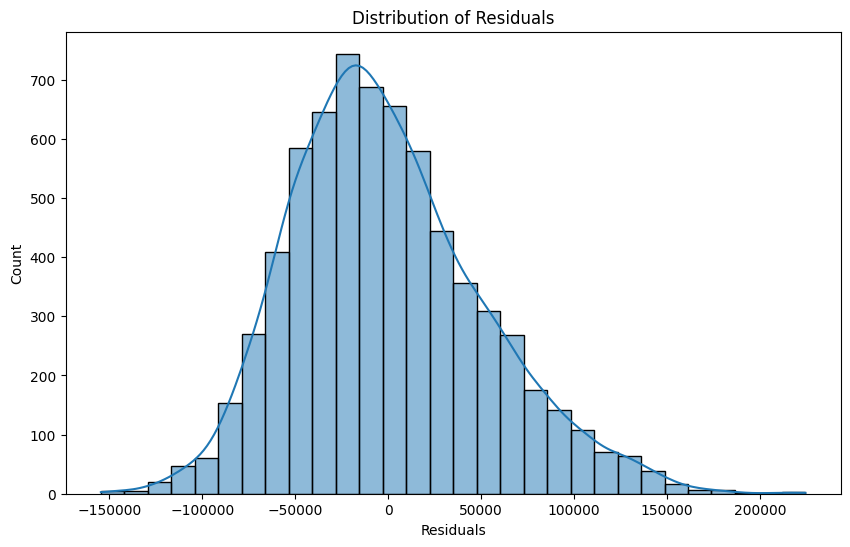

In [187]:

# Hitung residual
residuals = y_test - y_test_pred

# Distribusi residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


In [188]:
if hasattr(stacking_model.final_estimator_, "feature_importances_"):
    feature_importance = stacking_model.final_estimator_.feature_importances_
    estimators = [name for name, _ in stacking_model.estimators]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=estimators, y=feature_importance)
    plt.title("Feature Importance of Base Models in Stacking")
    plt.ylabel("Importance")
    plt.xlabel("Base Models")
    plt.show()

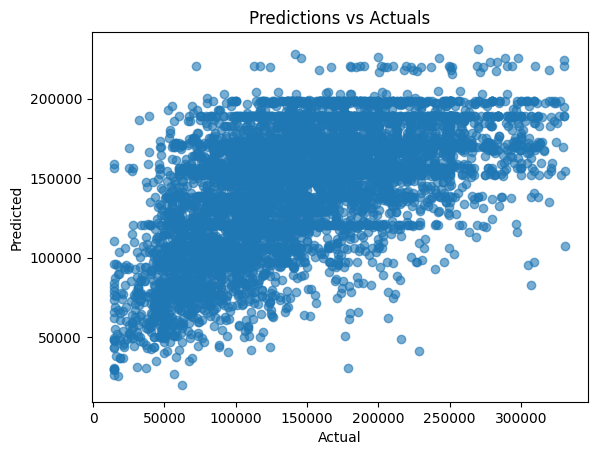

In [189]:

plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predictions vs Actuals")
plt.show()

**Mengembalikan 'id' pada test_data untuk submission**

In [190]:
test_data['id'] = test_data.index

In [191]:
# Menghapus kolom 'id' dari test_data dan memastikan kolomnya sama dengan X_train
test_data_features = test_data.drop(columns=['id'], errors='ignore')[X_train.columns]

**Membuat submission file**

In [192]:
# Melakukan prediksi untuk submission
preds_test = stacking_model.predict(test_data_features)

# Menyimpan hasil prediksi ke dalam file CSV
output = pd.DataFrame({'id': test_data['id'], 'salary': preds_test})
output.to_csv('submission.csv', index=False)
print("Successfully saved CSV as 'submission.csv'")


Successfully saved CSV as 'submission.csv'
